In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from matplotlib.lines import Line2D
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter

## Median Weekly Rent vs Population From 2016 to 2021 Across Suburban Rings

In [2]:
retained_cols = ['suburb_code', 'suburb', 'population_2016', 'population_2017',
       'population_2018', 'population_2019', 'population_2020',
       'population_2021']

population_df = pd.read_csv("../data/curated/Population.csv", usecols=retained_cols)

population_df = pd.melt(population_df, id_vars=["suburb", "suburb_code"])

# Create year column 
for i in range(len(population_df)):
    if population_df.loc[i, "variable"] == "population_2016":
        population_df.loc[i, "year"] = 2016
    elif population_df.loc[i, "variable"] == "population_2017":
        population_df.loc[i, "year"] = 2017
    elif population_df.loc[i, "variable"] == "population_2018":
        population_df.loc[i, "year"] = 2018
    elif population_df.loc[i, "variable"] == "population_2019":
        population_df.loc[i, "year"] = 2019
    elif population_df.loc[i, "variable"] == "population_2020":
        population_df.loc[i, "year"] = 2020
    elif population_df.loc[i, "variable"] == "population_2021":
        population_df.loc[i, "year"] = 2021

population_df.head()

,suburb,suburb_code,variable,value,year
0,gordon,201021012,population_2016,5761,2016.0
1,avoca,201031013,population_2016,3323,2016.0
2,beaufort,201031014,population_2016,4454,2016.0
3,golden plains,201031015,population_2016,4540,2016.0
4,yackandandah,204031075,population_2016,4578,2016.0


/tmp/ipykernel_680/3226012408.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  population_df = population_df.groupby(["year", "bins"], as_index=False)["value", "Median"].mean()


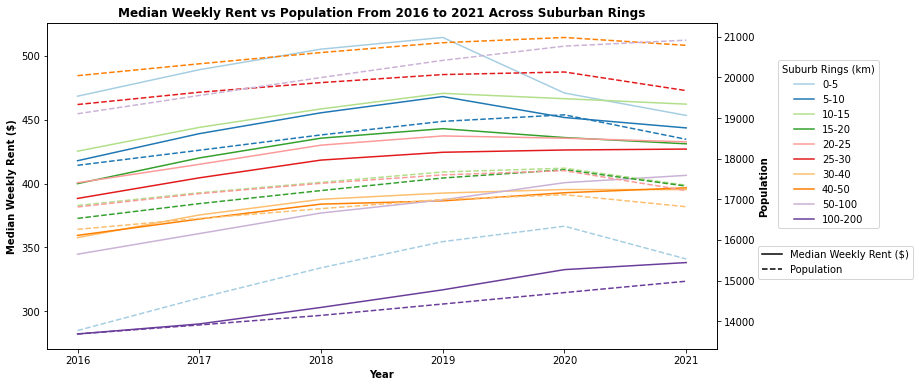

In [3]:
rental_df = pd.read_csv("../data/curated/Final_Preprocessed_Scraped_Rental.csv")
historical_rental_df = pd.read_csv("../data/curated/Fixed_Weekly_Median_Suburb_Rents.csv")

# Filter instances from 2016-2021
historical_rental_df = historical_rental_df[historical_rental_df["Year"] >= 2016] 

# Convert suburb names to lowercase
historical_rental_df["Suburb"] = historical_rental_df["Suburb"].str.lower()

# Group instances by year and suburb in historical rental dataset
historical_rental_df = historical_rental_df.groupby(["Year", "Suburb"], as_index=False)["Median"].mean()

# Compute distance to CBD for each suburb in the pop dataset
distance_to_cbd_df = rental_df.groupby("suburb", as_index=False)["distance_to_cbd"].mean()
population_df = population_df.groupby(["year", "suburb"], as_index=False)["value"].mean()
population_df = pd.merge(population_df, distance_to_cbd_df, on="suburb")
population_df = pd.merge(population_df, historical_rental_df, left_on=["suburb", "year"], right_on=["Suburb", "Year"]).drop(["Year", "Suburb"], axis=1)

# Bin suburbs based on distance to CBD
population_df["bins"] = pd.cut(population_df["distance_to_cbd"], [0, 5, 10, 15, 20, 25, 30, 40, 50, 100, 200], 
                         labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-40", "40-50", "50-100", "100-200"])

# Group instances by year and distance to CBD bins
population_df = population_df.groupby(["year", "bins"], as_index=False)["value", "Median"].mean()

# Create line plot for median rent from 2016-2021 across suburban rings
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.lineplot(data=population_df, x="year", y="Median", hue="bins", palette = 'Paired', err_style=None)
ax.set_xlabel("Year", fontweight="bold")
ax.set_ylabel("Median Weekly Rent ($)", fontweight="bold")
line = Line2D([0,1],[0,1],linestyle='-', color='black')
line2 = Line2D([0,1],[0,1],linestyle='--', color='black')
ax.add_artist(ax.legend([line, line2],['Median Weekly Rent ($)', 'Population'], loc="lower right", bbox_to_anchor=(1.3, 0.2)))  
ax.legend(title="Suburb Rings (km)", loc="upper right", bbox_to_anchor=(1.25, 0.9), 
           labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-40", "40-50", "50-100", "100-200"], 
           prop={'size': 10})  

# Create line plot for pop count from 2016-2021 across suburban rings
ax_second = ax.twinx()
ax_second = sns.lineplot(data=population_df, x="year", y="value", hue="bins", palette = 'Paired', legend=False, linestyle='--', err_style=None)
ax_second.set_ylabel("Population", fontweight="bold")
plt.title("Median Weekly Rent vs Population From 2016 to 2021 Across Suburban Rings", fontweight="bold")
fig.set_size_inches(12, 6)
plt.savefig('../plots/Weekly_Rent_Population_Ring.png', transparent=True, facecolor="white", bbox_inches="tight")
plt.show()
plt.close()

## Median Weekly Rent vs Population Density From 2016 to 2021 Across Suburban Rings

In [4]:
retained_cols = ['suburb_code', 'suburb', 'population_density_2016',
                'population_density_2017', 'population_density_2018',
                'population_density_2019', 'population_density_2020',
                'population_density_2021']

population_df = pd.read_csv("../data/curated/Population.csv", usecols=retained_cols)

population_df = pd.melt(population_df, id_vars=["suburb", "suburb_code"])

# Create year column 
for i in range(len(population_df)):
    if population_df.loc[i, "variable"] == "population_density_2016":
        population_df.loc[i, "year"] = 2016
    elif population_df.loc[i, "variable"] == "population_density_2017":
        population_df.loc[i, "year"] = 2017
    elif population_df.loc[i, "variable"] == "population_density_2018":
        population_df.loc[i, "year"] = 2018
    elif population_df.loc[i, "variable"] == "population_density_2019":
        population_df.loc[i, "year"] = 2019
    elif population_df.loc[i, "variable"] == "population_density_2020":
        population_df.loc[i, "year"] = 2020
    elif population_df.loc[i, "variable"] == "population_density_2021":
        population_df.loc[i, "year"] = 2021

population_df.head()

,suburb,suburb_code,variable,value,year
0,gordon,201021012,population_density_2016,6.775147,2016.0
1,avoca,201031013,population_density_2016,1.938468,2016.0
2,beaufort,201031014,population_density_2016,2.390712,2016.0
3,golden plains,201031015,population_density_2016,4.923644,2016.0
4,yackandandah,204031075,population_density_2016,6.464294,2016.0


/tmp/ipykernel_680/3847786854.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  population_df = population_df.groupby(["year", "bins"], as_index=False)["value", "Median"].mean()


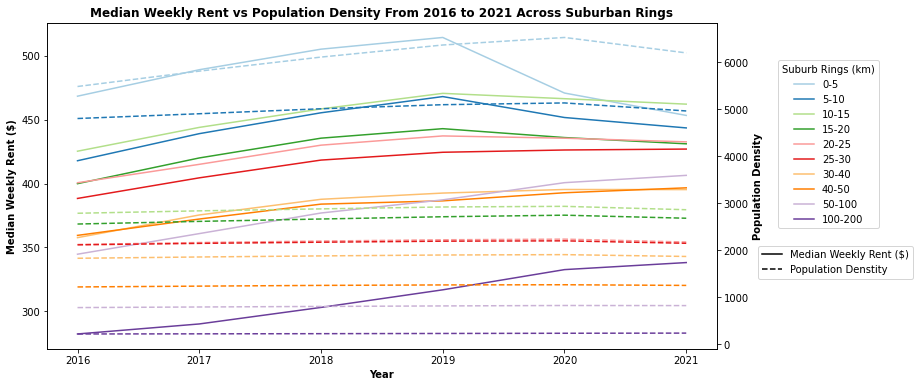

In [5]:
rental_df = pd.read_csv("../data/curated/Final_Preprocessed_Scraped_Rental.csv")
historical_rental_df = pd.read_csv("../data/curated/Fixed_Weekly_Median_Suburb_Rents.csv")

# Filter instances from 2016-2021
historical_rental_df = historical_rental_df[historical_rental_df["Year"] >= 2016] 

# Convert suburb names to lowercase
historical_rental_df["Suburb"] = historical_rental_df["Suburb"].str.lower()

# Group instances by year and suburb in historical rental dataset
historical_rental_df = historical_rental_df.groupby(["Year", "Suburb"], as_index=False)["Median"].mean()

# Compute distance to CBD for each suburb in the pop dataset
distance_to_cbd_df = rental_df.groupby("suburb", as_index=False)["distance_to_cbd"].mean()
population_df = population_df.groupby(["year", "suburb"], as_index=False)["value"].mean()
population_df = pd.merge(population_df, distance_to_cbd_df, on="suburb")
population_df = pd.merge(population_df, historical_rental_df, left_on=["suburb", "year"], right_on=["Suburb", "Year"]).drop(["Year", "Suburb"], axis=1)

# Bin suburbs based on distance to CBD
population_df["bins"] = pd.cut(population_df["distance_to_cbd"], [0, 5, 10, 15, 20, 25, 30, 40, 50, 100, 200], 
                         labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-40", "40-50", "50-100", "100-200"])

# Group instances by year and distance to CBD bins
population_df = population_df.groupby(["year", "bins"], as_index=False)["value", "Median"].mean()

# Create line plot for median rent from 2016-2021 across suburban rings
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.lineplot(data=population_df, x="year", y="Median", hue="bins", palette = 'Paired', err_style=None)
ax.set_xlabel("Year", fontweight="bold")
ax.set_ylabel("Median Weekly Rent ($)", fontweight="bold")
line = Line2D([0,1],[0,1],linestyle='-', color='black')
line2 = Line2D([0,1],[0,1],linestyle='--', color='black')
ax.add_artist(ax.legend([line, line2],['Median Weekly Rent ($)', 'Population Denstity'], loc="lower right", bbox_to_anchor=(1.3, 0.2)))  
ax.legend(title="Suburb Rings (km)", loc="upper right", bbox_to_anchor=(1.25, 0.9), 
           labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-40", "40-50", "50-100", "100-200"], prop={'size': 10})         


# Create line plot for pop density from 2016-2021 across suburban rings
ax_second = ax.twinx()
ax_second = sns.lineplot(data=population_df, x="year", y="value", hue="bins", palette = 'Paired', legend=False, linestyle='--', err_style=None)
ax_second.set_ylabel("Population Density", fontweight="bold")
plt.title("Median Weekly Rent vs Population Density From 2016 to 2021 Across Suburban Rings", fontweight="bold")
fig.set_size_inches(12, 6)
plt.savefig('../plots/Weekly_Rent_Population_Density_Ring.png', transparent=True, facecolor="white", bbox_inches="tight")
plt.show()
plt.close()

## Top 10 Suburbs: Population Density

In [6]:
retained_cols = ['suburb_code', 'suburb', 'population_density_2001', 'population_density_2002',
                'population_density_2003', 'population_density_2004',
                'population_density_2005', 'population_density_2006',
                'population_density_2007', 'population_density_2008',
                'population_density_2009', 'population_density_2010',
                'population_density_2011', 'population_density_2012',
                'population_density_2013', 'population_density_2014',
                'population_density_2015', 'population_density_2016',
                'population_density_2017', 'population_density_2018',
                'population_density_2019', 'population_density_2020',
                'population_density_2021']

rental_df = pd.read_csv("../data/curated/Final_Preprocessed_Scraped_Rental.csv")
historical_rental_df = pd.read_csv("../data/curated/Fixed_Weekly_Median_Suburb_Rents.csv")
population_df = pd.read_csv("../data/curated/Population.csv", usecols=retained_cols)

population_df = pd.melt(population_df, id_vars=["suburb", "suburb_code"])

# Create year column 
for i in range(len(population_df)):
    if population_df.loc[i, "variable"] == "population_density_2001":
        population_df.loc[i, "year"] = 2001
    if population_df.loc[i, "variable"] == "population_density_2002":
        population_df.loc[i, "year"] = 2002
    if population_df.loc[i, "variable"] == "population_density_2003":
        population_df.loc[i, "year"] = 2003
    if population_df.loc[i, "variable"] == "population_density_2004":
        population_df.loc[i, "year"] = 2004
    if population_df.loc[i, "variable"] == "population_density_2005":
        population_df.loc[i, "year"] = 2005
    if population_df.loc[i, "variable"] == "population_density_2006":
        population_df.loc[i, "year"] = 2006
    if population_df.loc[i, "variable"] == "population_density_2007":
        population_df.loc[i, "year"] = 2007
    if population_df.loc[i, "variable"] == "population_density_2008":
        population_df.loc[i, "year"] = 2008
    if population_df.loc[i, "variable"] == "population_density_2009":
        population_df.loc[i, "year"] = 2009
    if population_df.loc[i, "variable"] == "population_density_2010":
        population_df.loc[i, "year"] = 2010
    if population_df.loc[i, "variable"] == "population_density_2011":
        population_df.loc[i, "year"] = 2011
    if population_df.loc[i, "variable"] == "population_density_2012":
        population_df.loc[i, "year"] = 2012
    if population_df.loc[i, "variable"] == "population_density_2013":
        population_df.loc[i, "year"] = 2013
    if population_df.loc[i, "variable"] == "population_density_2014":
        population_df.loc[i, "year"] = 2014
    if population_df.loc[i, "variable"] == "population_density_2015":
        population_df.loc[i, "year"] = 2015
    elif population_df.loc[i, "variable"] == "population_density_2016":
        population_df.loc[i, "year"] = 2016
    elif population_df.loc[i, "variable"] == "population_density_2017":
        population_df.loc[i, "year"] = 2017
    elif population_df.loc[i, "variable"] == "population_density_2018":
        population_df.loc[i, "year"] = 2018
    elif population_df.loc[i, "variable"] == "population_density_2019":
        population_df.loc[i, "year"] = 2019
    elif population_df.loc[i, "variable"] == "population_density_2020":
        population_df.loc[i, "year"] = 2020
    elif population_df.loc[i, "variable"] == "population_density_2021":
        population_df.loc[i, "year"] = 2021

percentage_changes = population_df.copy()

percentage_changes.sort_values(['suburb','year'], inplace = True, ascending=[True, True])

percentage_changes['pct_chg'] = (percentage_changes.groupby('suburb')['value']
                                  .apply(pd.Series.pct_change) + 1)

percentage_changes.head()

,suburb,suburb_code,variable,value,year,pct_chg
157,abbotsford,206071139,population_density_2001,2384.372307,2001.0,NaN
619,abbotsford,206071139,population_density_2002,2492.961793,2002.0,1.045542
1081,abbotsford,206071139,population_density_2003,2553.289285,2003.0,1.024199
1543,abbotsford,206071139,population_density_2004,2557.885665,2004.0,1.001800
2005,abbotsford,206071139,population_density_2005,2584.314852,2005.0,1.010332


In [7]:
prc_changes_mean = percentage_changes.groupby(['suburb'], as_index = False).mean().sort_values(by =['pct_chg'], ascending = False)
prc_changes_mean = prc_changes_mean.dropna()
prc_changes_mean.suburb = prc_changes_mean.suburb.str.title()

ten_highest = prc_changes_mean.head(10).reset_index(drop = True)
ten_lowest = prc_changes_mean.tail(10).reset_index(drop = True)

print(ten_highest)
print(ten_lowest)

        suburb   suburb_code        value    year      pct_chg
0      Mildura  2.150214e+08   323.565719  2011.0  1301.741960
1      Horsham  2.150114e+08    95.754973  2011.0   113.590234
2      Bendigo  2.020210e+08   314.737601  2011.0   107.846939
3   Wangaratta  2.040211e+08   158.775586  2011.0    58.472584
4        Colac  2.170315e+08   110.946820  2011.0    39.325147
5    Swan Hill  2.150314e+08    42.468968  2011.0    35.169282
6       Ararat  2.150114e+08    25.947778  2011.0    32.108506
7  Maryborough  2.010310e+08    87.227425  2011.0    26.084097
8      Seymour  2.040111e+08    42.632206  2011.0    15.772877
9  Craigieburn  2.100514e+08  1269.551677  2011.0    14.858712
               suburb  suburb_code        value    year   pct_chg
0  Southern Grampians  217011423.0     0.975122  2011.0  0.994516
1              Loddon  202031033.0     1.182698  2011.0  0.993345
2        Keilor Downs  213011332.0  1864.694440  2011.0  0.993087
3          Gannawarra  215031401.0     1.93

/tmp/ipykernel_680/1479837932.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks(), size = 20)


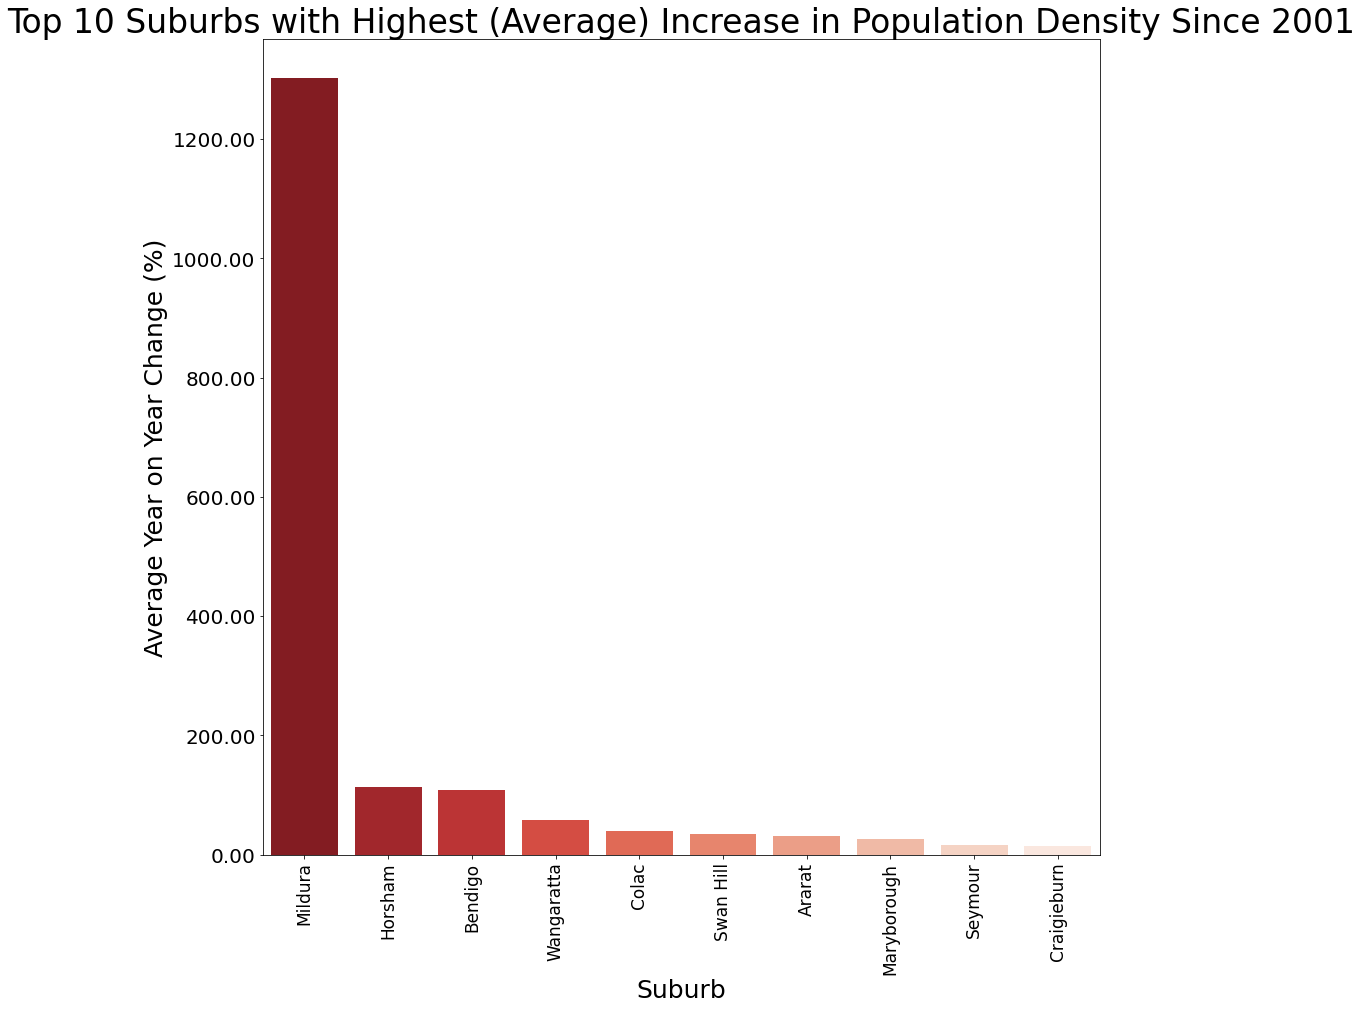

In [8]:
plt.figure(figsize=(15, 15)) 
fig = sns.barplot(x = 'suburb', y = 'pct_chg', data = ten_highest, palette = 'Reds_r' ,  dodge=False)
# fig.set(ylim=(1.05, 1.0576))

fig.set_ylabel('Average Year on Year Change (%)', size = 25)
fig.set_xlabel('Suburb', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in ten_highest['suburb']], size = 17, rotation = 90)
fig.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.set_title('Top 10 Suburbs with Highest (Average) Increase in Population Density Since 2001', size = 33)
plt.savefig('../plots/Top_10_Highest_Population_Density.png', transparent=True, facecolor="white", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_680/2682776359.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks(), size = 20)


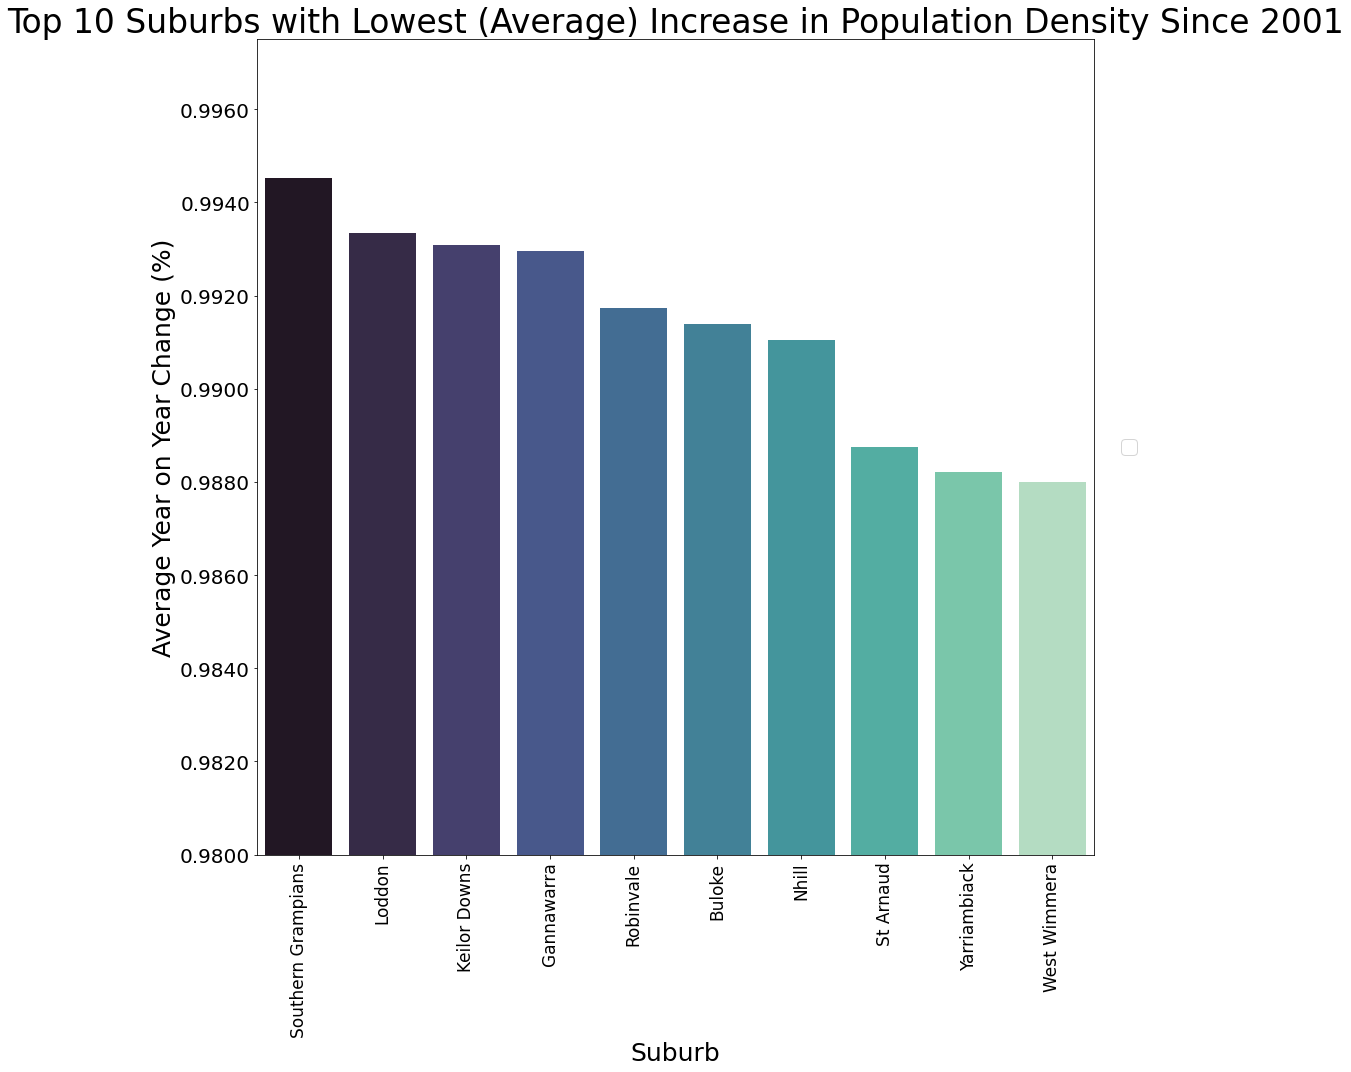

In [9]:
plt.figure(figsize=(15, 15)) 
fig = sns.barplot(x = 'suburb', y = 'pct_chg', data = ten_lowest, palette = 'mako' ,  dodge=False)
fig.set(ylim=(0.98, 0.9975))
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Average Year on Year Change (%)', size = 25)
fig.set_xlabel('Suburb', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in ten_lowest['suburb']], size = 17, rotation = 90)
fig.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_title('Top 10 Suburbs with Lowest (Average) Increase in Population Density Since 2001', size = 33)
plt.savefig('../plots/Top_10_Lowest_Population_Density.png', transparent=True, facecolor="white", bbox_inches="tight")

## Top 10 Suburbs: Population

In [10]:
retained_cols = ['suburb_code', 'suburb', 'population_2001', 'population_2002',
                'population_2003', 'population_2004', 'population_2005',
                'population_2006', 'population_2007', 'population_2008',
                'population_2009', 'population_2010', 'population_2011',
                'population_2012', 'population_2013', 'population_2014',
                'population_2015', 'population_2016', 'population_2017',
                'population_2018', 'population_2019', 'population_2020',
                'population_2021']

population_df = pd.read_csv("../data/curated/Population.csv", usecols=retained_cols)

population_df = pd.melt(population_df, id_vars=["suburb", "suburb_code"])

# Create year column 
for i in range(len(population_df)):
    if population_df.loc[i, "variable"] == "population_2001":
        population_df.loc[i, "year"] = 2001
    if population_df.loc[i, "variable"] == "population_2002":
        population_df.loc[i, "year"] = 2002
    if population_df.loc[i, "variable"] == "population_2003":
        population_df.loc[i, "year"] = 2003
    if population_df.loc[i, "variable"] == "population_2004":
        population_df.loc[i, "year"] = 2004
    if population_df.loc[i, "variable"] == "population_2005":
        population_df.loc[i, "year"] = 2005
    if population_df.loc[i, "variable"] == "population_2006":
        population_df.loc[i, "year"] = 2006
    if population_df.loc[i, "variable"] == "population_2007":
        population_df.loc[i, "year"] = 2007
    if population_df.loc[i, "variable"] == "population_2008":
        population_df.loc[i, "year"] = 2008
    if population_df.loc[i, "variable"] == "population_2009":
        population_df.loc[i, "year"] = 2009
    if population_df.loc[i, "variable"] == "population_2010":
        population_df.loc[i, "year"] = 2010
    if population_df.loc[i, "variable"] == "population_2011":
        population_df.loc[i, "year"] = 2011
    if population_df.loc[i, "variable"] == "population_2012":
        population_df.loc[i, "year"] = 2012
    if population_df.loc[i, "variable"] == "population_2013":
        population_df.loc[i, "year"] = 2013
    if population_df.loc[i, "variable"] == "population_2014":
        population_df.loc[i, "year"] = 2014
    if population_df.loc[i, "variable"] == "population_2015":
        population_df.loc[i, "year"] = 2015
    elif population_df.loc[i, "variable"] == "population_2016":
        population_df.loc[i, "year"] = 2016
    elif population_df.loc[i, "variable"] == "population_2017":
        population_df.loc[i, "year"] = 2017
    elif population_df.loc[i, "variable"] == "population_2018":
        population_df.loc[i, "year"] = 2018
    elif population_df.loc[i, "variable"] == "population_2019":
        population_df.loc[i, "year"] = 2019
    elif population_df.loc[i, "variable"] == "population_2020":
        population_df.loc[i, "year"] = 2020
    elif population_df.loc[i, "variable"] == "population_2021":
        population_df.loc[i, "year"] = 2021

percentage_changes = population_df.copy()

percentage_changes.sort_values(['suburb','year'], inplace = True, ascending=[True, True])

percentage_changes['pct_chg'] = (percentage_changes.groupby('suburb')['value']
                                  .apply(pd.Series.pct_change) + 1)

percentage_changes.head()

,suburb,suburb_code,variable,value,year,pct_chg
157,abbotsford,206071139,population_2001,4150,2001.0,NaN
619,abbotsford,206071139,population_2002,4339,2002.0,1.045542
1081,abbotsford,206071139,population_2003,4444,2003.0,1.024199
1543,abbotsford,206071139,population_2004,4452,2004.0,1.001800
2005,abbotsford,206071139,population_2005,4498,2005.0,1.010332


In [11]:
prc_changes_mean = percentage_changes.groupby(['suburb'], as_index = False).mean().sort_values(by =['pct_chg'], ascending = False)
prc_changes_mean = prc_changes_mean.dropna()
prc_changes_mean.suburb = prc_changes_mean.suburb.str.title()

ten_highest = prc_changes_mean.head(10).reset_index(drop = True)
ten_lowest = prc_changes_mean.tail(10).reset_index(drop = True)

print(ten_highest)
print(ten_lowest)

                      suburb   suburb_code         value    year    pct_chg
0                Craigieburn  2.100514e+08   9427.547619  2011.0  10.118759
1                 Point Cook  2.130515e+08  11185.396825  2011.0   5.405934
2                     Epping  2.090414e+08   9020.460317  2011.0   2.623592
3                    Horsham  2.150114e+08   9664.857143  2011.0   2.332545
4                    Mildura  2.150214e+08  11716.460317  2011.0   1.867897
5              Bacchus Marsh  2.070312e+08  11983.785714  2011.0   1.780869
6                South Yarra  2.060511e+08  12090.571429  2011.0   1.663627
7                    Benalla  2.040211e+08   6966.142857  2011.0   1.610532
8  Port Melbourne Industrial  2.060511e+08    115.666667  2011.0   1.593132
9                    Bendigo  2.020210e+08   8541.841270  2011.0   1.561943
               suburb  suburb_code         value    year   pct_chg
0  Southern Grampians  217011423.0   6399.380952  2011.0  0.994516
1              Loddon  2020310

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_680/2748695192.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks(), size = 20)


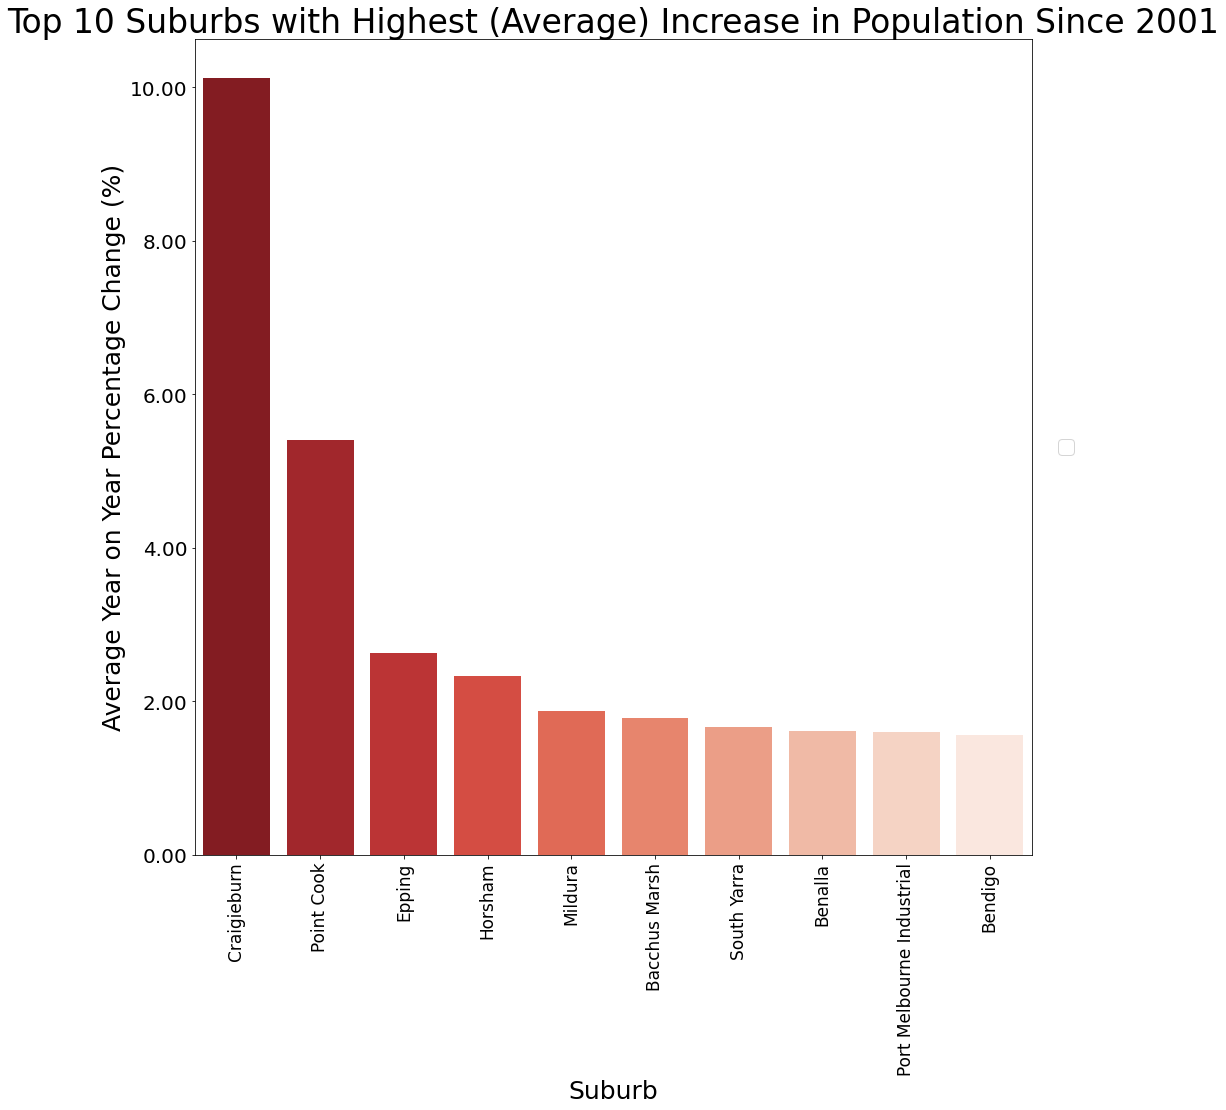

In [12]:
plt.figure(figsize=(15, 15)) 
fig = sns.barplot(x = 'suburb', y = 'pct_chg', data = ten_highest, palette = 'Reds_r' ,  dodge=False)
# fig.set(ylim=(1.05, 1.0576))
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Average Year on Year Percentage Change (%)', size = 25)
fig.set_xlabel('Suburb', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in ten_highest['suburb']], size = 17, rotation = 90)
fig.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.set_title('Top 10 Suburbs with Highest (Average) Increase in Population Since 2001', size = 33)
plt.savefig('../plots/Top_10_Highest_Population.png', transparent=True, facecolor="white", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_680/4275579534.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks(), size = 20)


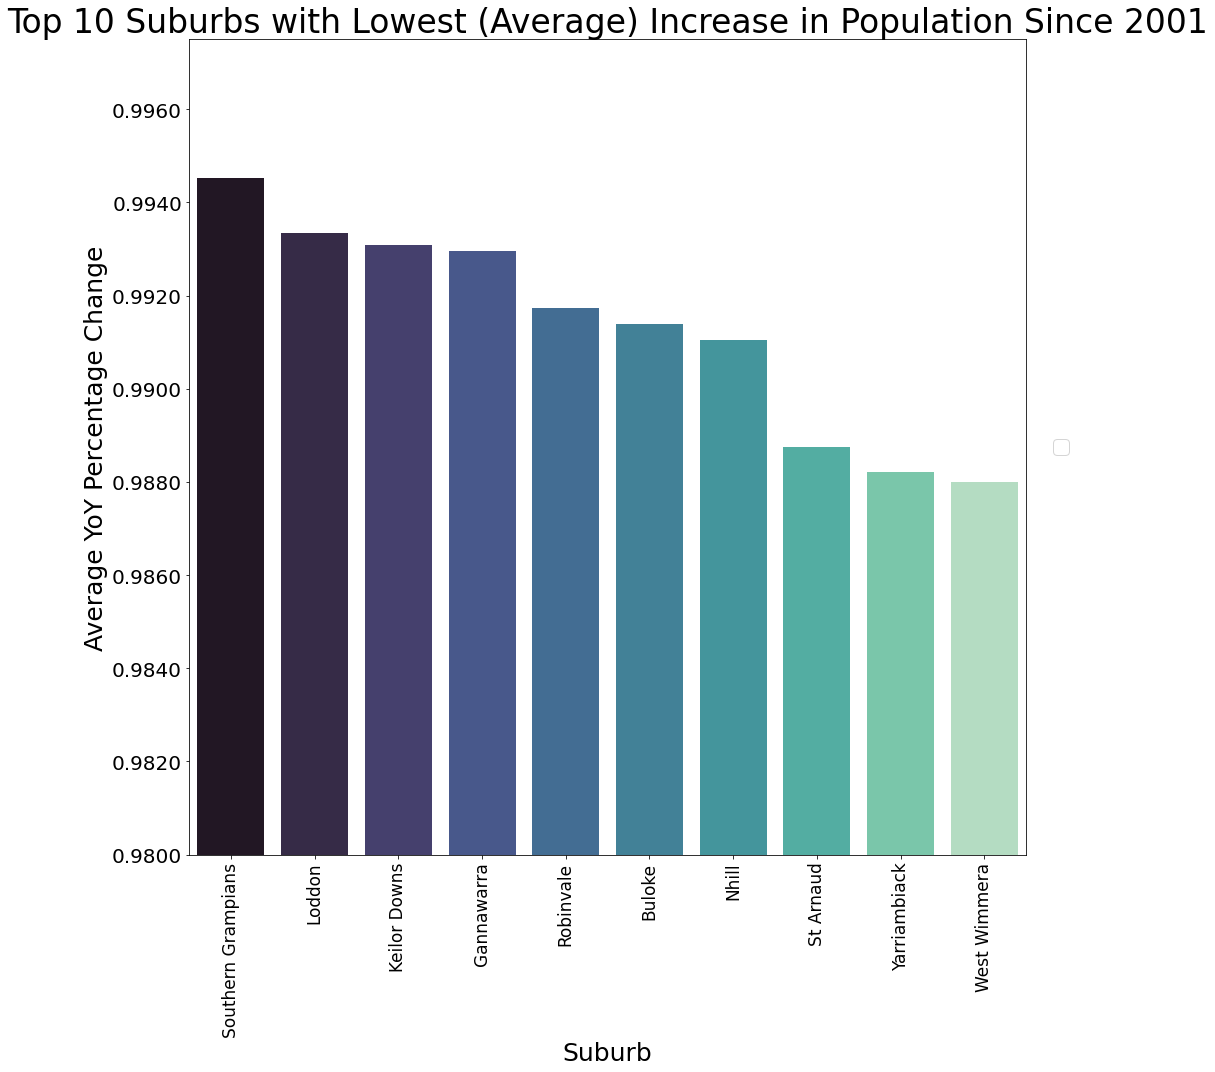

In [13]:
plt.figure(figsize=(15, 15)) 
fig = sns.barplot(x = 'suburb', y = 'pct_chg', data = ten_lowest, palette = 'mako' ,  dodge=False)
fig.set(ylim=(0.98, 0.9975))
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1,  prop={'size': 20})

fig.set_ylabel('Average YoY Percentage Change', size = 25)
fig.set_xlabel('Suburb', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in ten_lowest['suburb']], size = 17, rotation = 90)
fig.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_title('Top 10 Suburbs with Lowest (Average) Increase in Population Since 2001', size = 33)
plt.savefig('../plots/Top_10_Lowest_Population.png', transparent=True, facecolor="white", bbox_inches="tight")

## Top 10 Schools by Percentage of Study Scores 40 or Above

In [14]:
# read in school data
school_df = pd.read_csv("../data/curated/Cleaned_school.csv")
ranks_df = pd.read_excel("../data/raw/School_ranks.xlsx")

In [15]:
# merge data sets
school_ranks_df = pd.merge(school_df, ranks_df, left_on='School_Name', right_on='School')

# sort by study score in ascending
school_ranks_df = school_ranks_df.sort_values(by=['Percentage of study scores 40 or above (%)'], ascending=False)

# get top 10 schools by study score
school_ranks_df = school_ranks_df.head(10)

# capitalize first letter of each word in School
school_ranks_df.Address_Town = school_ranks_df.Address_Town.str.title()
school_ranks_df

,Unnamed: 0,School_Name,Address_Line_1,Address_Town,Address_Postcode,LGA_ID,LGA_Name,X,Y,School,2021 Ranking,2020 Ranking,2019 Ranking,VCE students,Median VCE score,Percentage of study scores 40 or above (%)
96,2187,Haileybury Girls College,855 Springvale Road,Keysborough,3173,267,Greater Dandenong (C),145.144767,-37.995547,Haileybury Girls College,1,8,7,344,37,37.2
73,1935,Bialik College,429 Auburn Road,Hawthorn East,3122,111,Boroondara (C),145.043371,-37.842269,Bialik College,3,1,3,155,37,32.6
37,1619,Ballarat Clarendon College,1425 Sturt Street,Ballarat,3350,57,Ballarat (C),143.833650,-37.559648,Ballarat Clarendon College,4,3,2,237,37,32.5
67,1837,Mount Scopus Memorial College,245 Burwood Highway,Burwood,3125,698,Whitehorse (C),145.117774,-37.847216,Mount Scopus Memorial College,6,2,4,238,36,31.9
61,1781,Huntingtower School,77 Waimarie Drive,Mt Waverley,3149,497,Monash (C),145.136288,-37.876741,Huntingtower School,7,21,5,179,37,31.6
14,1361,Melbourne High School,Forrest Hill,South Yarra,3141,635,Stonnington (C),144.995314,-37.836829,Melbourne High School,10,5,13,689,36,30.2
71,1921,Leibler Yavneh College,2 Nagle Avenue,Elsternwick,3185,231,Glen Eira (C),145.006626,-37.892871,Leibler Yavneh College,12,24,21,90,37,29.4
56,1762,Haileybury College,855 Springvale Rd,Keysborough,3173,267,Greater Dandenong (C),145.146430,-37.995979,Haileybury College,13,14,14,516,35,29.2
29,1525,Nossal High School,Sir Gustav Nossal Boulevard,Berwick,3806,161,Casey (C),145.336563,-38.038502,Nossal High School,17,15,38,417,36,26.9
84,2029,The King David School,517-519 Orrong Road,Armadale,3143,635,Stonnington (C),145.010495,-37.858226,The King David School,18,16,41,107,36,26.8


/tmp/ipykernel_680/3951020538.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks(), size = 20)


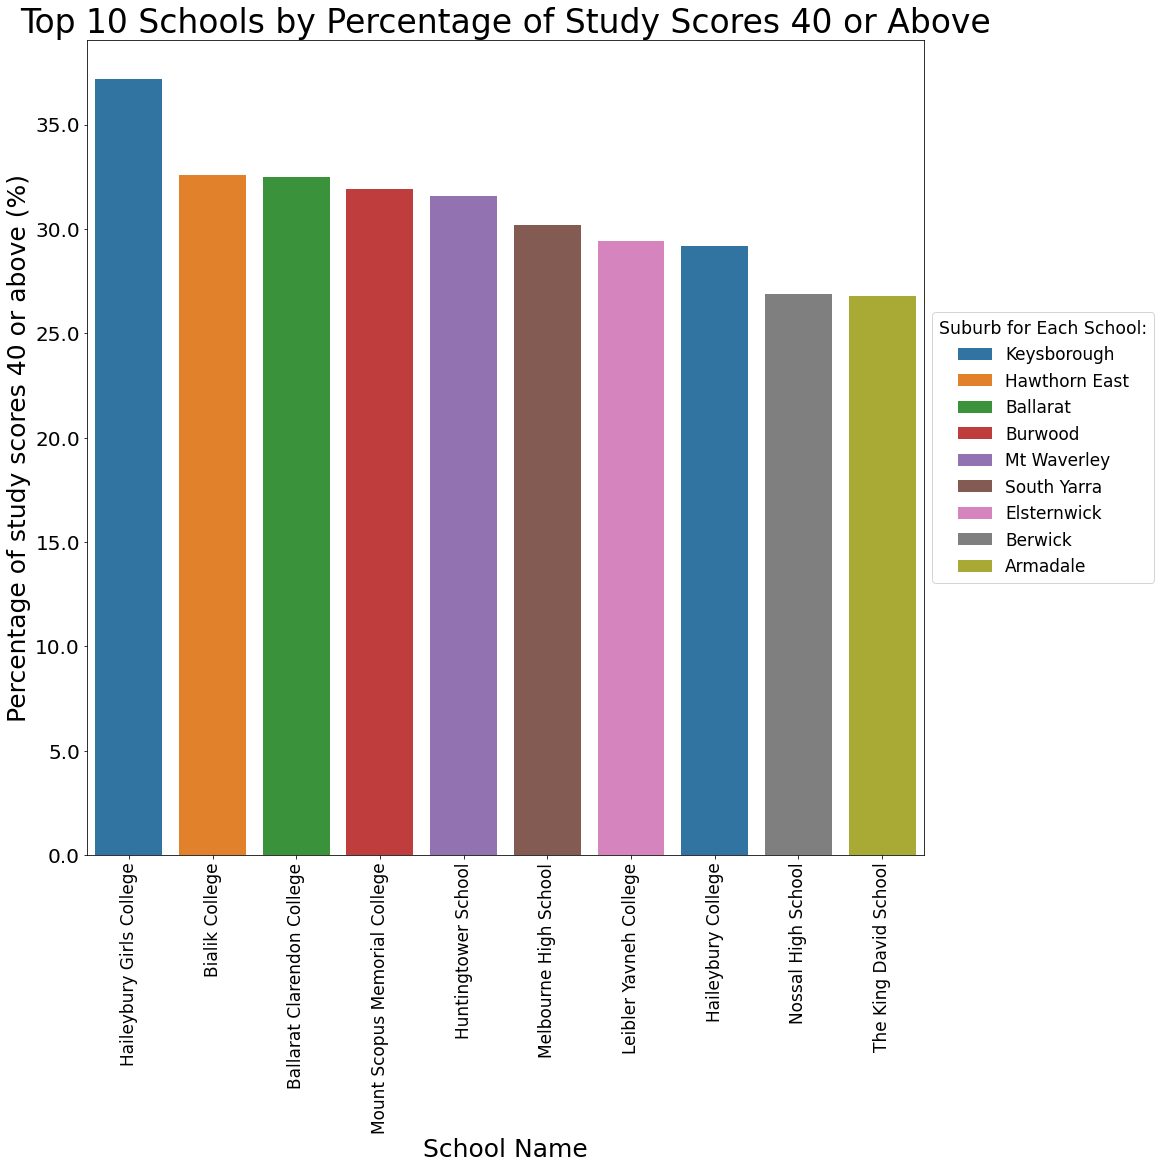

In [16]:
plt.figure(figsize=(15, 15)) 
fig = sns.barplot(x = 'School', y = 'Percentage of study scores 40 or above (%)', hue = 'Address_Town', 
                 data = school_ranks_df ,  dodge=False)
# plt.setp(fig.get_legend().get_title(), fontsize='32')
leg = fig.legend(title="Suburb for Each School", loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1,  prop={'size': 17})
leg.set_title("Suburb for Each School:", prop = {'size':'xx-large'})

fig.set_ylabel('Percentage of study scores 40 or above (%)', size = 25)
fig.set_xlabel('School Name', size = 25)

fig.set_yticklabels(fig.get_yticks(), size = 20)
fig.set_xticklabels([i for i in school_ranks_df['School']], size = 17, rotation = 90)
fig.set_title('Top 10 Schools by Percentage of Study Scores 40 or Above', size = 33)
plt.savefig('../plots/Top_10_Schools_Suburb.png', transparent=True, facecolor="white", bbox_inches="tight")